# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [3]:
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import StandardScaler, MinMaxScaler  
from sklearn.decomposition import PCA    
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor as DTR
#%pip install statsmodels
import statsmodels.api as sm
import warnings
warnings.simplefilter('ignore')

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [4]:
data = {'StudentID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
        'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]}

student_data = pd.DataFrame(data)
student_data.head()

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4


Draw a dispersion diagram (scatter plot) for the data.

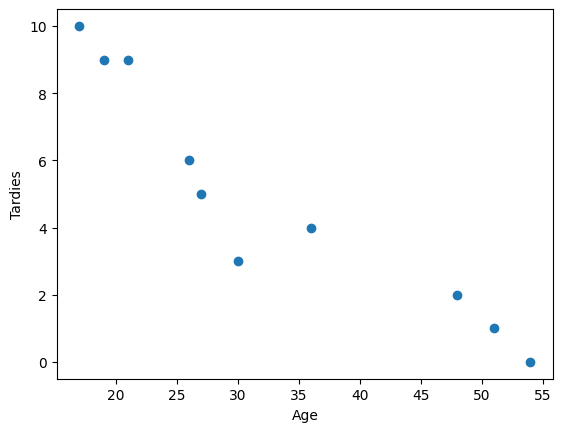

In [5]:
x_values = student_data['Age']
y_values = student_data['Tardies']

plt.scatter(x_values, y_values)
plt.xlabel('Age')
plt.ylabel('Tardies')

plt.show();

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
#Podemos ver una relación lineal inversamente proporcional entre estas dos variables, cuando aumenta la edad la tardía disminuye.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [6]:
cov = student_data.cov().loc['Age', 'Tardies']
corr = student_data.corr().loc['Age', 'Tardies']

print(f'Covarianza: {cov}')
print(f'Correlacion: {corr}')

Covarianza: -45.56666666666666
Correlacion: -0.9391626886887121


In [7]:
'''Se confirma lo que hemos dicho anteriormente de que son inversamente proporcional. La covarianza es una medida que indica la dirección de la relación lineal entre dos variables. Y la correlación es la covarianza normalizada.'''

'Se confirma lo que hemos dicho anteriormente de que son inversamente proporcional. La covarianza es una medida que indica la dirección de la relación lineal entre dos variables. Y la correlación es la covarianza normalizada.'

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [9]:
X = student_data[['Age']]      # la edad es la variable independiente
y = student_data['Tardies']    # los retrasos son la variable dependiente

modelo = LinearRegression()   
modelo.fit(X, y)             

LinearRegression()

In [10]:
print('un modelo lineal se compone de los elementos: y= mx + b')
print(f'el modelo lineal creado es: y={modelo.coef_}x + {modelo.intercept_ }')

un modelo lineal se compone de los elementos: y= mx + b
el modelo lineal creado es: y=[-0.24282077]x + 12.888803363135771


Plot your regression model on your scatter plot.

R2 de la regresión lineal:0.8820265558250109


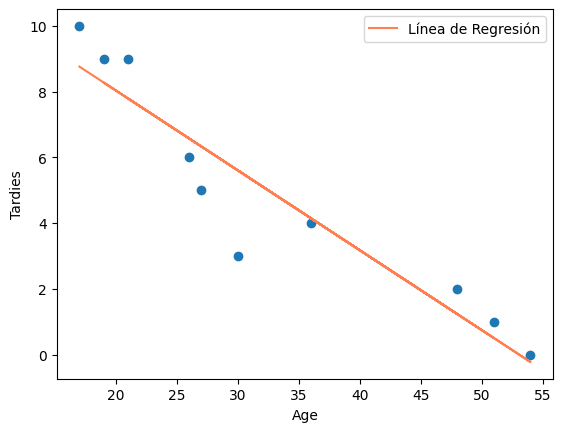

In [17]:
linea = modelo.intercept_ + modelo.coef_ * X
plt.scatter(x_values, y_values)    
plt.plot(X, linea, color='coral', label='Línea de Regresión')

plt.xlabel('Age')
plt.ylabel('Tardies')
plt.legend()

print(f'R2 de la regresión lineal:{modelo.score(X, y)}')
plt.show();


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [18]:
'''El R2 indica que la regresión lineal explica aproximadamente el 88,2% de la varianza de los retrasos basándonos en la edad.'''

'El R2 indica que la regresión lineal explica aproximadamente el 88,2% de la varianza de los retrasos basándonos en la edad.'

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [19]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

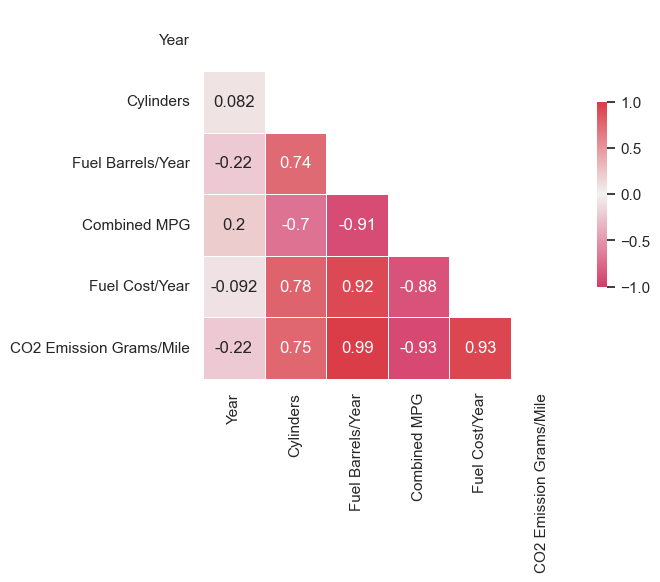

In [20]:
coches = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
corr = coches.corr()

sns.set(style='white')       # estilo blanco

mascara = np.triu(np.ones_like(corr, dtype=bool))   # mascara

cmap = sns.diverging_palette(0, 10, as_cmap=True)   # paleta de colores



sns.heatmap(corr,             # datos
            mask=mascara,     # mascara
            cmap=cmap,        # mapa de color
            
            vmax=1,           # maximo vertical
            vmin=-1,          # minimo vertical
            center=0,         # centro
            
            square=True,      # cuadrado el dato pintado
            linewidth=0.5,    # ancho de la linea
            
            cbar_kws={'shrink': 0.5},  # barra de color
            annot=True                 # anotacion, el numero escrito
            
           );

In [22]:
'''Se puede ver que la columna CO2 Emission Grams/Mile tiene una alta correlación con Fuel Barrels/Year y con Fuel Cost/Year.Por otra parte, también tiene una alta correlación, pero inversamente proporcional con la columna Combined MPG.'''

'Se puede ver que la columna CO2 Emission Grams/Mile tiene una alta correlación con Fuel Barrels/Year y con Fuel Cost/Year.Por otra parte, también tiene una alta correlación, pero inversamente proporcional con la columna Combined MPG.'

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [23]:
X = coches.drop(columns=['CO2 Emission Grams/Mile'])
y = vehicles['CO2 Emission Grams/Mile']

dtr = DTR().fit(X, y)
dict(zip(X.columns, dtr.feature_importances_*100))

{'Year': 0.008132587615508361,
 'Cylinders': 0.003949931451293041,
 'Fuel Barrels/Year': 83.25343986648278,
 'Combined MPG': 16.685124315270304,
 'Fuel Cost/Year': 0.04935329918010102}

In [24]:
f'R2: {dtr.score(X, y)}'

'R2: 0.9995584428233178'

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [26]:
# Voy a hacer un modelo OLS para comparar con el anterior: 
X = sm.add_constant(X)
modelo = sm.OLS(y, X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                             23:15:52   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
'''Como hemos podido ver, el R2 del árbol de decisión es algo más alto, con lo cual explica mejor la varianza de la variable dependiente.
En cuanto a los parámetros de posición, un ejemplo es:"Combined MPG"=-3.04. Esto indica que por cada aumento de una milla por galón, disminuyen 3.0404 unidades en "CO2 Emission Grams/Mile". Lo cual habíamos visto anteriormente al ver la relación inversamente proporcional.
En cuanto a Fuel Barrels/Year, se ve una relación directamente proporcional que dice que por cada aumento en una unidad en esa variable, se espera un aumento de 19.0529 unidades en las emisiones.
Esta información se complementa por la ofrecida por el modelo de árbol de decisión respecto a la importancia relativa de las variables predictoras.
Aquí observamos que "Fuel Barrels/Year" es la variable más importante, seguida por "Combined MPG".'''

'Como hemos podido ver, el R2 del árbol de decisión es algo más alto, con lo cual explica mejor la varianza de la variable dependiente.\nEn cuanto a los parámetros de posición, un ejemplo es:"Combined MPG"=-3.04. Esto indica que por cada aumento de una milla por galón, disminuyen 3.0404 unidades en "CO2 Emission Grams/Mile". Lo cual habíamos visto anteriormente al ver la relación inversamente proporcional.\nEn cuanto a Fuel Barrels/Year, se ve una relación directamente proporcional que dice que por cada aumento en una unidad en esa variable, se espera un aumento de 19.0529 unidades en las emisiones.\nEsta información se complementa por la ofrecida por el modelo de árbol de decisión respecto a la importancia relativa de las variables predictoras.\nAquí observamos que "Fuel Barrels/Year" es la variable más importante, seguida por "Combined MPG".'

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 